# Clustering K_means

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

In [75]:
df=pd.read_csv('Clustering.csv')
xx=df.replace(to_replace=['Male', 'Female'], value=[0, 1])

Text(0, 0.5, 'Annual Income (k$)')

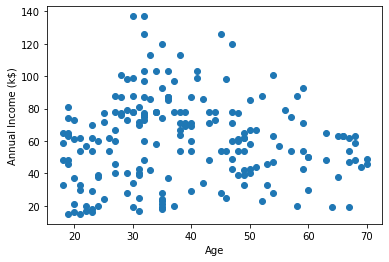

In [76]:
x=xx[['Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
xxx=xx[['Age']]
yyy=xx[['Annual Income (k$)']]
zzz=xx[['Spending Score (1-100)']]
plt.scatter(xxx,yyy)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

In [77]:
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=0).fit(x)
cluster=kmeans.labels_

In [78]:
df['Cluster']=cluster
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [79]:

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
df['cen_x'] = df.Cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.Cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

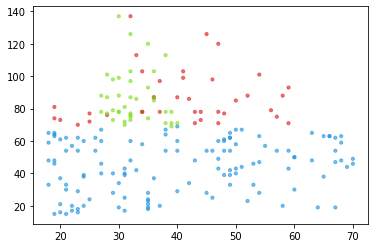

In [80]:
plt.scatter(xxx, yyy, c=df['c'], alpha = 0.6, s=10)

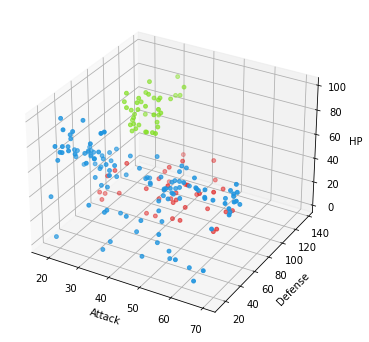

In [81]:
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(xxx, yyy, zzz, c=df['c'], s=15)
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')
plt.show()